**Credit Risk Detection:** An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is more risky and who is not.

##Data set:
Training data set provided by organization contains the following features:

Feature | Description | Type
----------|--------------- | -----------
**`Id`** | A unique identifier for a customer. **Example:** 1, 2, 3 | int
**`income`** | Income of the user. **Example:** 304000, 434000 | int
**`age`** | Age of the user. **Example:** 32, 44, 63 | int
**`experience`** | Professional experience of the user in years. **Example:** 8,7,20 | int
**`profession`** | profession. **Example:** Software_engineer, Mechanical_engineer | string
**`married`** | Whether married or single. **Example:** single, married | string
**`house_ownership`** | Owned or rented or neither. | string
**`car_ownership`** | Does the person own a car **Example:** yes, no | string
**`current_job_years`** | Years of experience in the current job | int
**`current_house_years`** | Number of years in the current residence | int
**`city`** | City of residence **Example:** bareilly, bhopal, indore | string
**`state`** | State of residence **Example:** Uttar_Pradesh, West_Bengal | string

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`risk_flag` | A binary flag indicating whether a customer is a defaulter or not. A value of `0` indicates the customer is not defaulter, and a value of `1` indicates the customer is defaulter.

In [ ]:
# Name - Adesh Kumar
# Institute - IIT(ISM) Dhanbad
# ----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

## 1.1 Reading Data

In [ ]:
# Importing the datasets
url1 = 'https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Training%20Data.csv'
train_data = pd.read_csv(url1)

url2 = 'https://lead-files.nyc3.cdn.digitaloceanspaces.com/data/hackathon-1/Test%20Data.csv'
test_data = pd.read_csv(url2)

In [ ]:
print("Number of data points in train data", train_data.shape)
print('-'*50)
print("The attributes of data :", train_data.columns.values)

Number of data points in train data (252000, 13)
--------------------------------------------------
The attributes of data : ['Id' 'income' 'age' 'experience' 'married' 'house_ownership'
 'car_ownership' 'profession' 'city' 'state' 'current_job_years'
 'current_house_years' 'risk_flag']


## 1.2 Exploratory data Analysis

Number of customers that are defaulted on a loan  30996 , ( 12.3 %)
Number of customers that are not defaulted on a loan  221004 , ( 87.7 %)


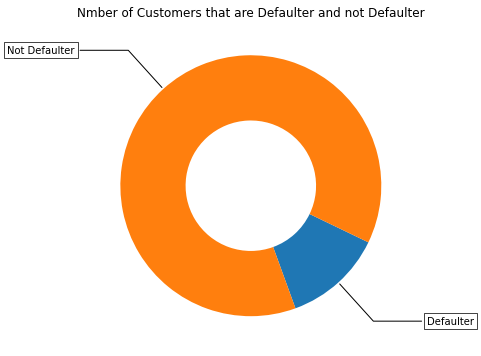

In [ ]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = train_data['risk_flag'].value_counts()
print("Number of customers that are defaulted on a loan ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of customers that are not defaulted on a loan ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Defaulter", "Not Defaulter"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-70)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of Customers that are Defaulter and not Defaulter")

plt.show()

### 1.2.1 Univariate Analysis: Profession

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='risk_flag', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Number of customers')
    plt.ylabel(xtick)
    plt.title('% of defaulters: '+ xtick + ' wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'defaulters'))
    plt.show()
    '''ind = np.arange(data.shape[0])
    total = data[col3].values
    defaulter = data[col2].values
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(ind, total, label='total')
    ax.bar(ind, defaulter, label='defaulters')
    ax.set_ylabel('Number of customers')
    ax.set_xticks(ind, list(data[xtick].values))
    ax.set_title('% of defaulters: '+ xtick + ' wise')
    ax.legend()
    plt.show()'''

In [ ]:
def univariate_barplots(data, col1, col2='risk_flag', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg = 'mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

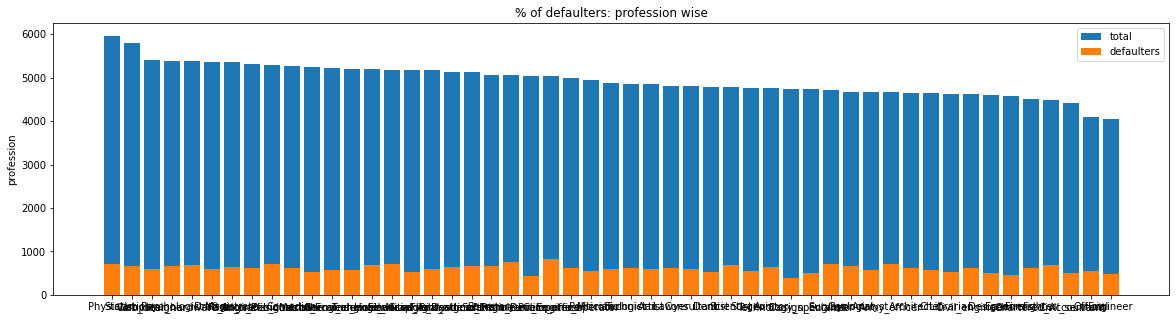

                    profession  risk_flag  total       Avg
37                   Physician        710   5957  0.119188
44                Statistician        671   5806  0.115570
50                Web_designer        589   5397  0.109135
40                Psychologist        657   5390  0.121892
13  Computer_hardware_engineer        690   5372  0.128444
              profession  risk_flag  total       Avg
24           Firefighter        612   4507  0.135789
7   Chartered_Accountant        690   4493  0.153572
11         Civil_servant        511   4413  0.115794
35              Official        555   4087  0.135796
21              Engineer        478   4048  0.118083


In [ ]:
univariate_barplots(train_data, 'profession', 'risk_flag', False)

### 1.2.2 Univariate Analysis: city

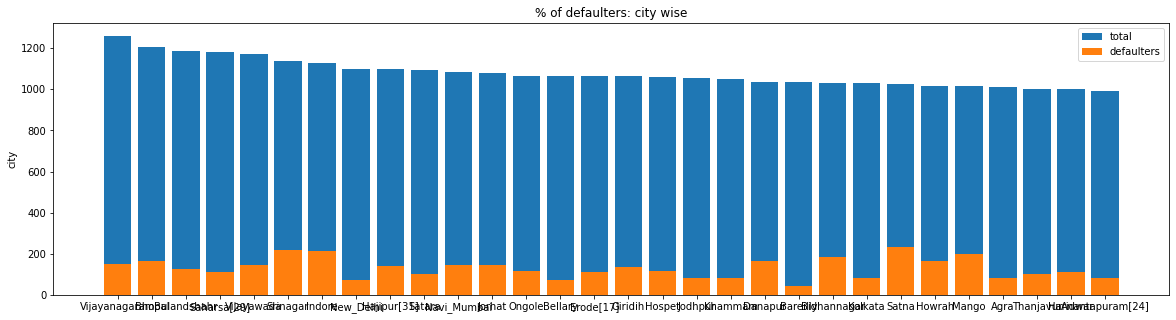

              city  risk_flag  total       Avg
312  Vijayanagaram        149   1259  0.118348
53          Bhopal        166   1208  0.137417
64     Bulandshahr        124   1185  0.104641
256    Saharsa[29]        113   1180  0.095763
313     Vijayawada        147   1172  0.125427
                city  risk_flag  total       Avg
184            Mango        200   1016  0.196850
2               Agra         81   1012  0.080040
291        Thanjavur        101   1003  0.100698
116         Haridwar        110   1001  0.109890
21   Anantapuram[24]         83    994  0.083501


In [ ]:
univariate_barplots(train_data, 'city', 'risk_flag', top = 30)

### 1.2.3 Univariate Analysis: State

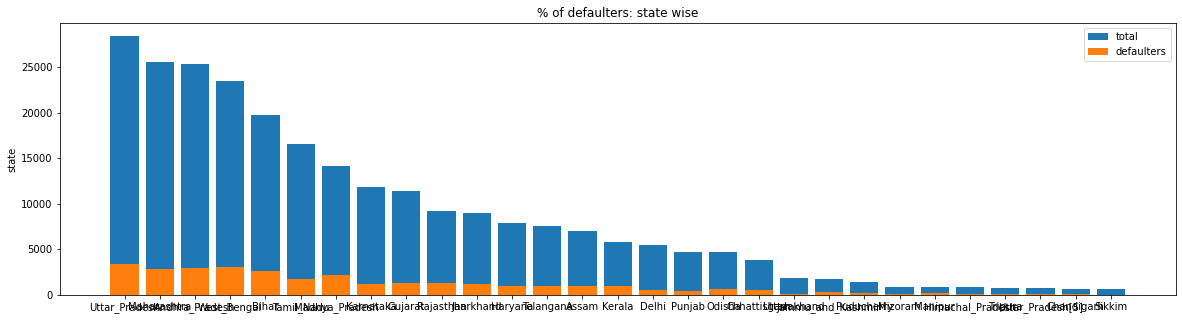

             state  risk_flag  total       Avg
25   Uttar_Pradesh       3343  28400  0.117711
14     Maharashtra       2895  25562  0.113254
0   Andhra_Pradesh       2935  25297  0.116022
28     West_Bengal       3009  23483  0.128135
2            Bihar       2583  19780  0.130586
               state  risk_flag  total       Avg
8   Himachal_Pradesh        111    833  0.133253
24           Tripura        136    809  0.168109
26  Uttar_Pradesh[5]         97    743  0.130552
3         Chandigarh         61    656  0.092988
21            Sikkim         28    608  0.046053


In [ ]:
univariate_barplots(train_data, 'state', 'risk_flag', False)

### 1.2.4 Univariate Analysis: Current_house_years

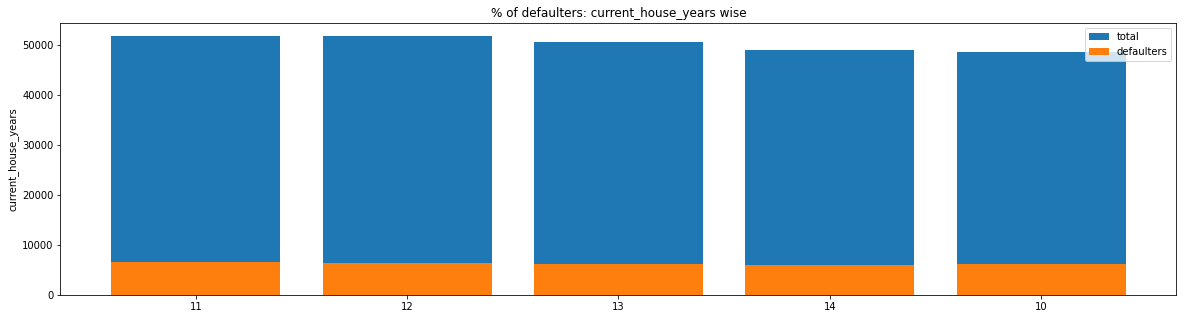

   current_house_years  risk_flag  total       Avg
1                   11       6483  51873  0.124978
2                   12       6304  51791  0.121720
3                   13       6182  50659  0.122032
4                   14       5945  49003  0.121319
0                   10       6082  48674  0.124954
   current_house_years  risk_flag  total       Avg
1                   11       6483  51873  0.124978
2                   12       6304  51791  0.121720
3                   13       6182  50659  0.122032
4                   14       5945  49003  0.121319
0                   10       6082  48674  0.124954


In [ ]:
univariate_barplots(train_data, 'current_house_years', 'risk_flag', False)

In [ ]:
defaulters = train_data[train_data['risk_flag'] == 1]['current_house_years'].values
non_defaulters = train_data[train_data['risk_flag'] == 0]['current_house_years'].values

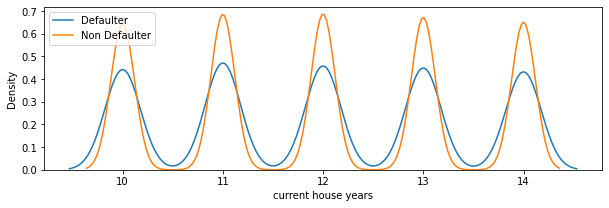

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(defaulters, hist=False, label="Defaulter")
sns.distplot(non_defaulters, hist=False, label="Non Defaulter")
plt.xlabel('current house years')
plt.legend()
plt.show()

### 1.2.5 Univariate Analysis: House Ownership

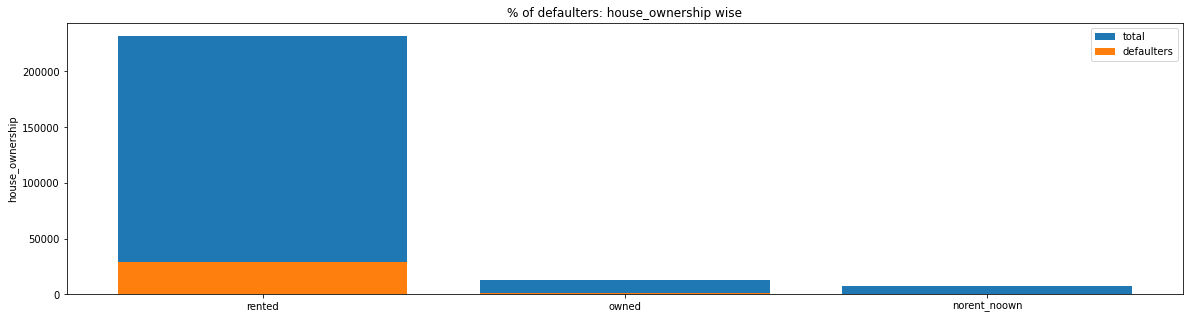

  house_ownership  risk_flag   total       Avg
2          rented      29121  231898  0.125577
1           owned       1160   12918  0.089797
0    norent_noown        715    7184  0.099527
  house_ownership  risk_flag   total       Avg
2          rented      29121  231898  0.125577
1           owned       1160   12918  0.089797
0    norent_noown        715    7184  0.099527


In [ ]:
univariate_barplots(train_data, 'house_ownership', 'risk_flag', False)

### 1.2.6 Univariate Analysis: Car Ownership

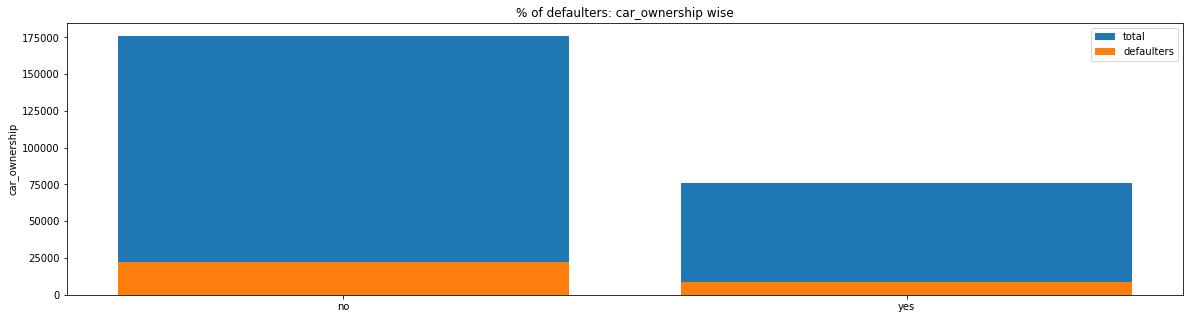

  car_ownership  risk_flag   total       Avg
0            no      22561  176000  0.128188
1           yes       8435   76000  0.110987
  car_ownership  risk_flag   total       Avg
0            no      22561  176000  0.128188
1           yes       8435   76000  0.110987


In [ ]:
univariate_barplots(train_data, 'car_ownership', 'risk_flag', False)

### 1.2.7 Univariate Analysis: Married

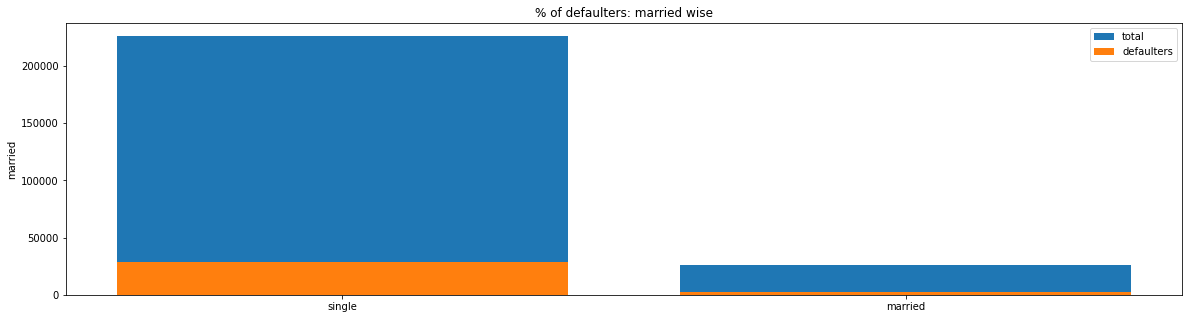

   married  risk_flag   total       Avg
1   single      28360  226272  0.125336
0  married       2636   25728  0.102456
   married  risk_flag   total       Avg
1   single      28360  226272  0.125336
0  married       2636   25728  0.102456


In [ ]:
univariate_barplots(train_data, 'married', 'risk_flag', False)

### 1.2.8 Univariate Analysis: Age

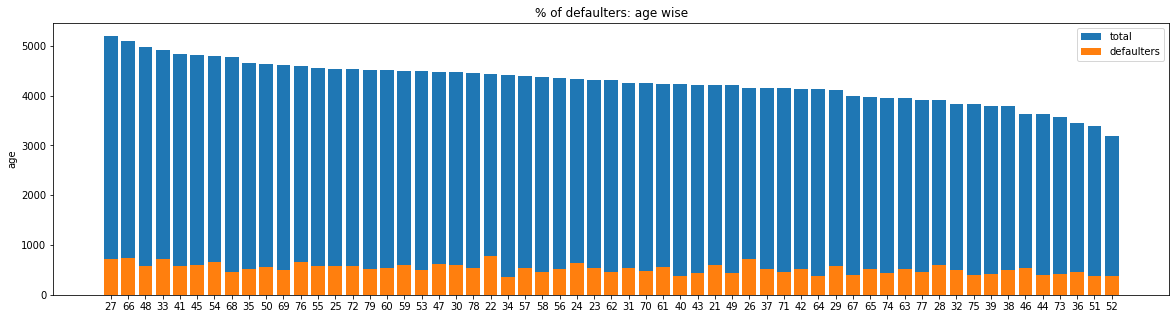

    age  risk_flag  total       Avg
6    27        720   5197  0.138541
45   66        737   5092  0.144737
27   48        578   4967  0.116368
12   33        719   4921  0.146109
20   41        570   4827  0.118086
    age  risk_flag  total       Avg
23   44        388   3622  0.107123
52   73        417   3569  0.116839
15   36        454   3443  0.131862
30   51        385   3397  0.113335
31   52        370   3197  0.115734


In [ ]:
univariate_barplots(train_data, 'age', 'risk_flag', False)

In [ ]:
defaulters = train_data[train_data['risk_flag'] == 1]['age'].values
non_defaulters = train_data[train_data['risk_flag'] == 0]['age'].values

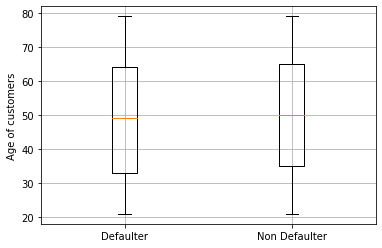

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaulters, non_defaulters])
plt.xticks([1,2],('Defaulter','Non Defaulter'))
plt.ylabel('Age of customers')
plt.grid()
plt.show()

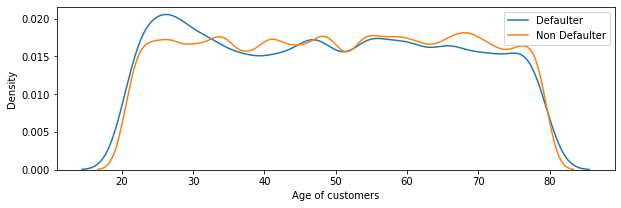

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(defaulters, hist=False, label="Defaulter")
sns.distplot(non_defaulters, hist=False, label="Non Defaulter")
plt.xlabel('Age of customers')
plt.legend()
plt.show()

### 1.2.9 Univariate Analysis: Experience

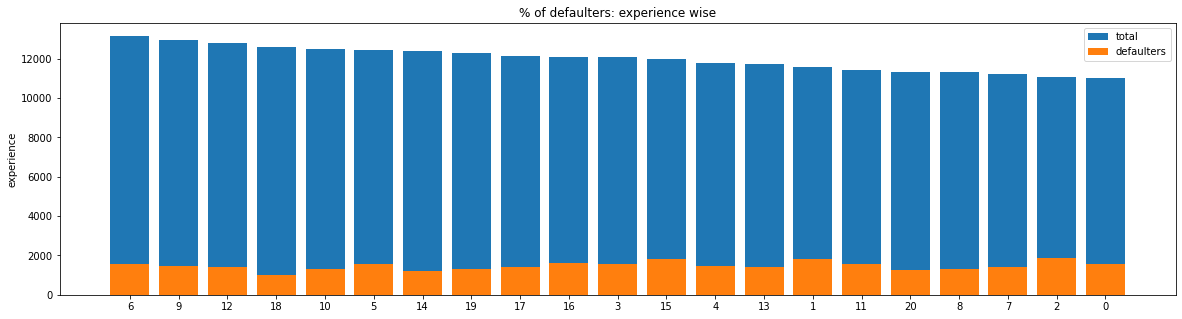

    experience  risk_flag  total       Avg
6            6       1557  13158  0.118331
9            9       1459  12936  0.112786
12          12       1396  12800  0.109063
18          18       1029  12601  0.081660
10          10       1315  12503  0.105175
    experience  risk_flag  total       Avg
20          20       1284  11350  0.113128
8            8       1334  11350  0.117533
7            7       1403  11232  0.124911
2            2       1890  11087  0.170470
0            0       1582  11043  0.143258


In [ ]:
univariate_barplots(train_data, 'experience', 'risk_flag', False)

In [ ]:
defaulters = train_data[train_data['risk_flag'] == 1]['experience'].values
non_defaulters = train_data[train_data['risk_flag'] == 0]['experience'].values

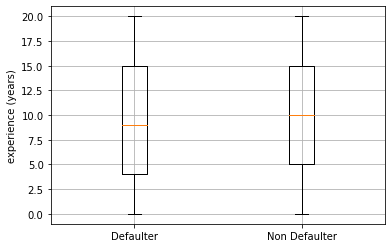

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaulters, non_defaulters])
plt.xticks([1,2],('Defaulter','Non Defaulter'))
plt.ylabel('experience (years)')
plt.grid()
plt.show()

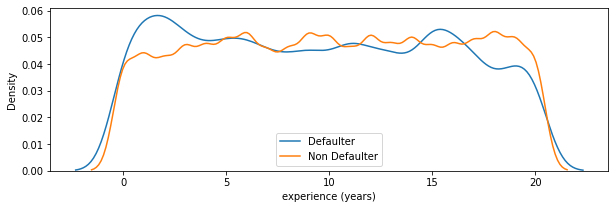

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(defaulters, hist=False, label="Defaulter")
sns.distplot(non_defaulters, hist=False, label="Non Defaulter")
plt.xlabel('experience (years)')
plt.legend()
plt.show()

### 1.2.10 Univariate Analysis: Current_job_years

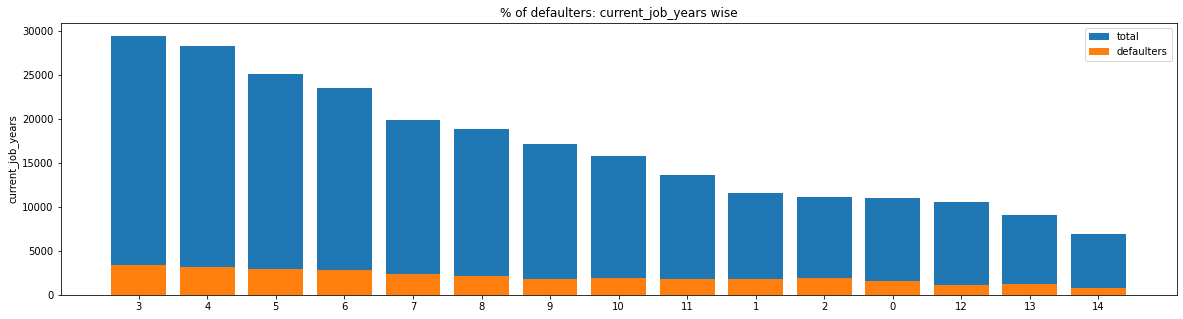

   current_job_years  risk_flag  total       Avg
3                  3       3411  29460  0.115784
4                  4       3207  28339  0.113166
5                  5       2972  25091  0.118449
6                  6       2870  23491  0.122174
7                  7       2345  19925  0.117691
    current_job_years  risk_flag  total       Avg
2                   2       1890  11087  0.170470
0                   0       1582  11043  0.143258
12                 12       1116  10605  0.105233
13                 13       1271   9099  0.139686
14                 14        817   6916  0.118132


In [ ]:
univariate_barplots(train_data, 'current_job_years', 'risk_flag', False)

In [ ]:
defaulters = train_data[train_data['risk_flag'] == 1]['current_job_years'].values
non_defaulters = train_data[train_data['risk_flag'] == 0]['current_job_years'].values

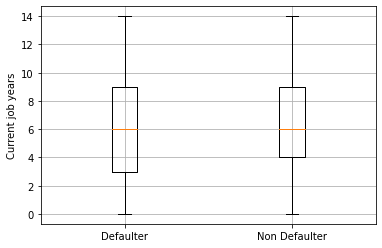

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaulters, non_defaulters])
plt.xticks([1,2],('Defaulter','Non Defaulter'))
plt.ylabel('Current job years')
plt.grid()
plt.show()

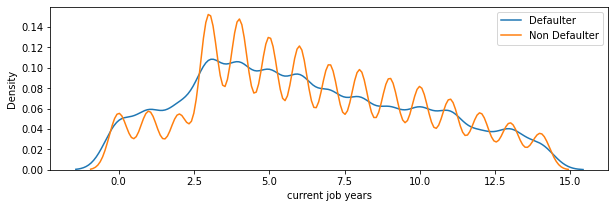

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(defaulters, hist=False, label="Defaulter")
sns.distplot(non_defaulters, hist=False, label="Non Defaulter")
plt.xlabel('current job years')
plt.legend()
plt.show()

### 1.2.11 Univariate Analysis: Income

In [ ]:
defaulters = train_data[train_data['risk_flag'] == 1]['income'].values
non_defaulters = train_data[train_data['risk_flag'] == 0]['income'].values

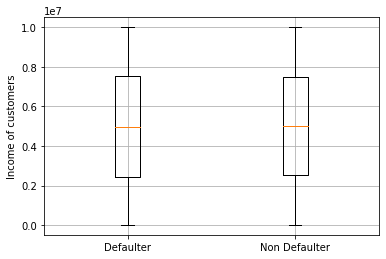

In [ ]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([defaulters, non_defaulters])
plt.xticks([1,2],('Defaulter','Non Defaulter'))
plt.ylabel('Income of customers')
plt.grid()
plt.show()

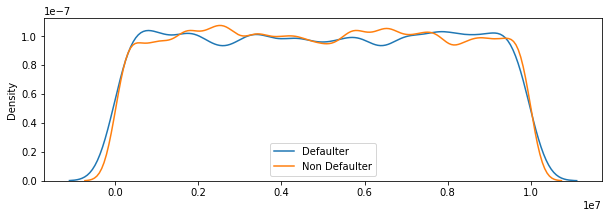

In [ ]:
plt.figure(figsize=(10,3))
sns.distplot(defaulters, hist=False, label="Defaulter")
sns.distplot(non_defaulters, hist=False, label="Non Defaulter")
plt.legend()
plt.show()

In [ ]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# 2. Data Preprocessing

###2.1.1 Preprocessing Categorical features: State

In [ ]:
print('Train Data')
print(train_data['state'].value_counts())
print('='*50)
print('Test Data')
print(test_data['state'].value_counts())

Train Data
Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64
Test Data
Uttar Pradesh        3110
Andhra Pradesh       2957
Maharashtra          2830
West Bengal          2593
Bihar                2300
Tamil Nadu           1926
Madhya Pradesh

In test data there space between two words of state name: space (' ') shold be replaced by underscore (_)

In [ ]:
test_data['state'] = test_data['state'].str.replace(' ','_')
test_data['state'] = test_data['state'].str.lower()
train_data['state'] = train_data['state'].str.replace(' ','_')
train_data['state'] = train_data['state'].str.lower()

In [ ]:
print('Unique states in train data: ',len(train_data['state'].value_counts()))
print(train_data['state'].value_counts())
print('='*50)
print('Unique states in test data: ',len(test_data['state'].value_counts()))
print(test_data['state'].value_counts())

Unique states in train data:  29
uttar_pradesh        28400
maharashtra          25562
andhra_pradesh       25297
west_bengal          23483
bihar                19780
tamil_nadu           16537
madhya_pradesh       14122
karnataka            11855
gujarat              11408
rajasthan             9174
jharkhand             8965
haryana               7890
telangana             7524
assam                 7062
kerala                5805
delhi                 5490
punjab                4720
odisha                4658
chhattisgarh          3834
uttarakhand           1874
jammu_and_kashmir     1780
puducherry            1433
mizoram                849
manipur                849
himachal_pradesh       833
tripura                809
uttar_pradesh[5]       743
chandigarh             656
sikkim                 608
Name: state, dtype: int64
Unique states in test data:  29
uttar_pradesh        3110
andhra_pradesh       2957
maharashtra          2830
west_bengal          2593
bihar                2

###2.1.2 Preprocessing Categorical features: City

In [ ]:
print('Unique cities in train data: ', len(train_data['city'].value_counts()))
print(train_data['city'].value_counts())
print('='*50)
print('Unique cities in test data: ', len(test_data['city'].value_counts()))
print(test_data['city'].value_counts())

Unique cities in train data:  317
Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: city, Length: 317, dtype: int64
Unique cities in test data:  317
Saharsa[29]      153
Vijayanagaram    148
Bulandshahr      144
Danapur          134
Kolkata          133
                ... 
Bhusawal          54
Shahjahanpur      52
Patna             51
Ujjain            48
Naihati           48
Name: city, Length: 317, dtype: int64


In [ ]:
test_data['city'] = test_data['city'].str.replace(' ','_')
test_data['city'] = test_data['city'].str.lower()
train_data['city'] = train_data['city'].str.replace(' ','_')
train_data['city'] = train_data['city'].str.lower()

In [ ]:
print('Unique cities in train data: ', len(train_data['city'].value_counts()))
print(train_data['city'].value_counts())
print('='*50)
print('Unique cities in test data: ', len(test_data['city'].value_counts()))
print(test_data['city'].value_counts())

Unique cities in train data:  317
vijayanagaram       1259
bhopal              1208
bulandshahr         1185
saharsa[29]         1180
vijayawada          1172
                    ... 
ujjain               486
warangal[11][12]     459
bettiah[33]          457
katni                448
karaikudi            431
Name: city, Length: 317, dtype: int64
Unique cities in test data:  317
saharsa[29]      153
vijayanagaram    148
bulandshahr      144
danapur          134
kolkata          133
                ... 
bhusawal          54
shahjahanpur      52
patna             51
naihati           48
ujjain            48
Name: city, Length: 317, dtype: int64


###2.1.3 Preprocessing Categorical features: profession

In [ ]:
print('Unique profession in train data: ', len(train_data['profession'].value_counts()))
print(train_data['profession'].value_counts())
print('='*50)
print('Unique profession in test data: ', len(test_data['profession'].value_counts()))
print(test_data['profession'].value_counts())

Unique profession in train data:  51
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist            

In [ ]:
test_data['profession'] = test_data['profession'].str.replace(' ','_')
test_data['profession'] = test_data['profession'].str.lower()
train_data['profession'] = train_data['profession'].str.replace(' ','_')
train_data['profession'] = train_data['profession'].str.lower()

In [ ]:
print('Unique profession in train data: ', len(train_data['profession'].value_counts()))
print(train_data['profession'].value_counts())
print('='*50)
print('Unique profession in test data: ', len(test_data['profession'].value_counts()))
print(test_data['profession'].value_counts())

Unique profession in train data:  51
physician                     5957
statistician                  5806
web_designer                  5397
psychologist                  5390
computer_hardware_engineer    5372
drafter                       5359
magistrate                    5357
fashion_designer              5304
air_traffic_controller        5281
comedian                      5259
industrial_engineer           5250
mechanical_engineer           5217
chemical_engineer             5205
technical_writer              5195
hotel_manager                 5178
financial_analyst             5167
graphic_designer              5166
flight_attendant              5128
biomedical_engineer           5127
secretary                     5061
software_developer            5053
petroleum_engineer            5041
police_officer                5035
computer_operator             4990
politician                    4944
microbiologist                4881
technician                    4864
artist            

###2.1.4 Preprocessing Categorical features: married, car_ownership, house_ownership

In [ ]:
print('train data')
print(train_data['married'].value_counts())
print('='*50)
print('test data')
print(test_data['married'].value_counts())

train data
single     226272
married     25728
Name: married, dtype: int64
test data
single     25170
married     2830
Name: married, dtype: int64


In [ ]:
print('train data')
print(train_data['house_ownership'].value_counts())
print('='*50)
print('test data')
print(test_data['house_ownership'].value_counts())

train data
rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64
test data
rented          25805
owned            1430
norent_noown      765
Name: house_ownership, dtype: int64


In [ ]:
print('train data')
print(train_data['car_ownership'].value_counts())
print('='*50)
print('test data')
print(test_data['car_ownership'].value_counts())

train data
no     176000
yes     76000
Name: car_ownership, dtype: int64
test data
no     19625
yes     8375
Name: car_ownership, dtype: int64


These column in our data sets are looking same and appropriate. So there is no need to further process it 

In [ ]:
y = train_data['risk_flag'].values
X = train_data.drop(['risk_flag'], axis=1)
X.head(2)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,1303835,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13


## 2.2 Splitting train_data into Train and cross validation(or test): Stratified Sampling

In [164]:
y = train_data['risk_flag'].values
X = train_data
X.head(2)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,mechanical_engineer,rewa,madhya_pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,software_developer,parbhani,maharashtra,9,13,0


In [165]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, stratify=y, random_state = 0)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.10, stratify=y_train, random_state = 0)

In [167]:
#balance the Inbalance data sets in X_train
data_0 = X_train[X_train['risk_flag'] == 0]
data_1 = X_train[X_train['risk_flag'] == 1]
print(data_0.shape)
print(data_1.shape)
print(data_0.shape[0]/data_1.shape[0])
if (data_1.shape[0]/data_0.shape[0] < 0.8):
  for i in range(6):
    X_train = X_train.append(data_1)

data_0 = X_train[X_train['risk_flag'] == 0]
data_1 = X_train[X_train['risk_flag'] == 1]
print(data_0.shape)
print(data_1.shape)
print(data_0.shape[0]/data_1.shape[0])
y_train = X_train['risk_flag'].values

(182992, 13)
(179648, 13)
1.0186141788386178
(182992, 13)
(179648, 13)
1.0186141788386178


##2.3 Make Data Model Ready: encoding numerical, categorical features

In [169]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
features = ['state','city','profession','married','car_ownership','house_ownership']
onehencoder.fit(X_train[features])
print(onehencoder.get_feature_names())
X_train_onehot = onehencoder.transform(X_train[features])
X_cv_onehot = onehencoder.transform(X_cv[features])
X_test_onehot = onehencoder.transform(X_test[features])
test_data_onehot = onehencoder.transform(test_data[features])
print("After OneHotEncoding")
print(X_train_onehot.shape, y_train.shape)
print(X_cv_onehot.shape, y_cv.shape)
print(X_test_onehot.shape, y_test.shape)
print(test_data_onehot.shape)
from joblib import dump, load
dump(onehencoder, 'onehencoder.pkl') 
print(onehencoder.get_feature_names())
print(onehencoder.categories_)

['x0_andhra_pradesh' 'x0_assam' 'x0_bihar' 'x0_chandigarh'
 'x0_chhattisgarh' 'x0_delhi' 'x0_gujarat' 'x0_haryana'
 'x0_himachal_pradesh' 'x0_jammu_and_kashmir' 'x0_jharkhand'
 'x0_karnataka' 'x0_kerala' 'x0_madhya_pradesh' 'x0_maharashtra'
 'x0_manipur' 'x0_mizoram' 'x0_odisha' 'x0_puducherry' 'x0_punjab'
 'x0_rajasthan' 'x0_sikkim' 'x0_tamil_nadu' 'x0_telangana' 'x0_tripura'
 'x0_uttar_pradesh' 'x0_uttar_pradesh[5]' 'x0_uttarakhand'
 'x0_west_bengal' 'x1_adoni' 'x1_agartala' 'x1_agra' 'x1_ahmedabad'
 'x1_ahmednagar' 'x1_aizawl' 'x1_ajmer' 'x1_akola' 'x1_alappuzha'
 'x1_aligarh' 'x1_allahabad' 'x1_alwar' 'x1_amaravati' 'x1_ambala'
 'x1_ambarnath' 'x1_ambattur' 'x1_amravati' 'x1_amritsar' 'x1_amroha'
 'x1_anand' 'x1_anantapur' 'x1_anantapuram[24]' 'x1_arrah' 'x1_asansol'
 'x1_aurangabad' 'x1_aurangabad[39]' 'x1_avadi' 'x1_bahraich' 'x1_ballia'
 'x1_bally' 'x1_bangalore' 'x1_baranagar' 'x1_barasat' 'x1_bardhaman'
 'x1_bareilly' 'x1_bathinda' 'x1_begusarai' 'x1_belgaum' 'x1_bellary'
 'x1

In [170]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
features = ['income','age','experience','current_job_years','current_house_years']
normalizer.fit(X_train[features])
X_train_norm = normalizer.transform(X_train[features])
X_cv_norm = normalizer.transform(X_cv[features])
X_test_norm = normalizer.transform(X_test[features])
test_data_norm = normalizer.transform(test_data[features])
dump(normalizer,'std_scaler.pkl')



print("After Normalization")
print(X_train_norm.shape, y_train.shape)
print(X_cv_norm.shape, y_cv.shape)
print(X_test_norm.shape, y_test.shape)
print(test_data_norm.shape)
print("="*100)

After Normalization
(362640, 5) (362640,)
(23184, 5) (23184,)
(20160, 5) (20160,)
(28000, 5)


In [171]:
from scipy.sparse import hstack
X_tr = hstack((X_train_onehot, X_train_norm)).tocsr()
X_cr = hstack((X_cv_onehot, X_cv_norm)).tocsr()
X_te = hstack((X_test_onehot, X_test_norm)).tocsr()
test_data_process = hstack((test_data_onehot, test_data_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print(test_data_process.shape)
print("="*100)

Final Data matrix
(362640, 409) (362640,)
(23184, 409) (23184,)
(20160, 409) (20160,)
(28000, 409)


### 2.3.1 encoding categorical feature: state

In [168]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['state'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_state_ohe = onehencoder.transform(X_train['state'].values.reshape(-1, 1))
X_cv_state_ohe = onehencoder.transform(X_cv['state'].values.reshape(-1, 1))
X_test_state_ohe = onehencoder.transform(X_test['state'].values.reshape(-1, 1))
test_data_state_ohe = onehencoder.transform(test_data['state'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(test_data_state_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 29) (362640,)
(23184, 29) (23184,)
(20160, 29) (20160,)
(28000, 29)
['x0_andhra_pradesh' 'x0_assam' 'x0_bihar' 'x0_chandigarh'
 'x0_chhattisgarh' 'x0_delhi' 'x0_gujarat' 'x0_haryana'
 'x0_himachal_pradesh' 'x0_jammu_and_kashmir' 'x0_jharkhand'
 'x0_karnataka' 'x0_kerala' 'x0_madhya_pradesh' 'x0_maharashtra'
 'x0_manipur' 'x0_mizoram' 'x0_odisha' 'x0_puducherry' 'x0_punjab'
 'x0_rajasthan' 'x0_sikkim' 'x0_tamil_nadu' 'x0_telangana' 'x0_tripura'
 'x0_uttar_pradesh' 'x0_uttar_pradesh[5]' 'x0_uttarakhand'
 'x0_west_bengal']


### 2.3.2 encoding categorical feature: city

In [172]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['city'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_city_ohe = onehencoder.transform(X_train['city'].values.reshape(-1, 1))
X_cv_city_ohe = onehencoder.transform(X_cv['city'].values.reshape(-1, 1))
X_test_city_ohe = onehencoder.transform(X_test['city'].values.reshape(-1, 1))
test_data_city_ohe = onehencoder.transform(test_data['city'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_city_ohe.shape, y_train.shape)
print(X_cv_city_ohe.shape, y_cv.shape)
print(X_test_city_ohe.shape, y_test.shape)
print(test_data_city_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 317) (362640,)
(23184, 317) (23184,)
(20160, 317) (20160,)
(28000, 317)
['x0_adoni' 'x0_agartala' 'x0_agra' 'x0_ahmedabad' 'x0_ahmednagar'
 'x0_aizawl' 'x0_ajmer' 'x0_akola' 'x0_alappuzha' 'x0_aligarh'
 'x0_allahabad' 'x0_alwar' 'x0_amaravati' 'x0_ambala' 'x0_ambarnath'
 'x0_ambattur' 'x0_amravati' 'x0_amritsar' 'x0_amroha' 'x0_anand'
 'x0_anantapur' 'x0_anantapuram[24]' 'x0_arrah' 'x0_asansol'
 'x0_aurangabad' 'x0_aurangabad[39]' 'x0_avadi' 'x0_bahraich' 'x0_ballia'
 'x0_bally' 'x0_bangalore' 'x0_baranagar' 'x0_barasat' 'x0_bardhaman'
 'x0_bareilly' 'x0_bathinda' 'x0_begusarai' 'x0_belgaum' 'x0_bellary'
 'x0_berhampore' 'x0_berhampur' 'x0_bettiah[33]' 'x0_bhagalpur'
 'x0_bhalswa_jahangir_pur' 'x0_bharatpur' 'x0_bhatpara' 'x0_bhavnagar'
 'x0_bhilai' 'x0_bhilwara' 'x0_bhimavaram' 'x0_bhind' 'x0_bhiwandi'
 'x0_bhiwani' 'x0_bhopal' 'x0_bhubaneswar' 'x0_bhusawal' 'x0_bidar'
 'x0_bidhannagar' 'x0_bihar_sharif' 'x0_bijapur' 'x0_bikaner'
 'x0_bilaspur' 'x0_bokaro

### 2.3.3 encoding categorical feature: profession

In [173]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['profession'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_profession_ohe = onehencoder.transform(X_train['profession'].values.reshape(-1, 1))
X_cv_profession_ohe = onehencoder.transform(X_cv['profession'].values.reshape(-1, 1))
X_test_profession_ohe = onehencoder.transform(X_test['profession'].values.reshape(-1, 1))
test_data_profession_ohe = onehencoder.transform(test_data['profession'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_profession_ohe.shape, y_train.shape)
print(X_cv_profession_ohe.shape, y_cv.shape)
print(X_test_profession_ohe.shape, y_test.shape)
print(test_data_profession_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 51) (362640,)
(23184, 51) (23184,)
(20160, 51) (20160,)
(28000, 51)
['x0_air_traffic_controller' 'x0_analyst' 'x0_architect' 'x0_army_officer'
 'x0_artist' 'x0_aviator' 'x0_biomedical_engineer'
 'x0_chartered_accountant' 'x0_chef' 'x0_chemical_engineer'
 'x0_civil_engineer' 'x0_civil_servant' 'x0_comedian'
 'x0_computer_hardware_engineer' 'x0_computer_operator' 'x0_consultant'
 'x0_dentist' 'x0_design_engineer' 'x0_designer' 'x0_drafter'
 'x0_economist' 'x0_engineer' 'x0_fashion_designer' 'x0_financial_analyst'
 'x0_firefighter' 'x0_flight_attendant' 'x0_geologist'
 'x0_graphic_designer' 'x0_hotel_manager' 'x0_industrial_engineer'
 'x0_lawyer' 'x0_librarian' 'x0_magistrate' 'x0_mechanical_engineer'
 'x0_microbiologist' 'x0_official' 'x0_petroleum_engineer' 'x0_physician'
 'x0_police_officer' 'x0_politician' 'x0_psychologist' 'x0_scientist'
 'x0_secretary' 'x0_software_developer' 'x0_statistician' 'x0_surgeon'
 'x0_surveyor' 'x0_technical_writer' 'x0_techni

### 2.3.4 encoding categorical feature: married

In [174]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['married'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_married_ohe = onehencoder.transform(X_train['married'].values.reshape(-1, 1))
X_cv_married_ohe = onehencoder.transform(X_cv['married'].values.reshape(-1, 1))
X_test_married_ohe = onehencoder.transform(X_test['married'].values.reshape(-1, 1))
test_data_married_ohe = onehencoder.transform(test_data['married'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_married_ohe.shape, y_train.shape)
print(X_cv_married_ohe.shape, y_cv.shape)
print(X_test_married_ohe.shape, y_test.shape)
print(test_data_married_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 2) (362640,)
(23184, 2) (23184,)
(20160, 2) (20160,)
(28000, 2)
['x0_married' 'x0_single']


### 2.3.5 encoding categorical feature: car_ownership

In [175]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['car_ownership'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_car_ownership_ohe = onehencoder.transform(X_train['car_ownership'].values.reshape(-1, 1))
X_cv_car_ownership_ohe = onehencoder.transform(X_cv['car_ownership'].values.reshape(-1, 1))
X_test_car_ownership_ohe = onehencoder.transform(X_test['car_ownership'].values.reshape(-1, 1))
test_data_car_ownership_ohe = onehencoder.transform(test_data['car_ownership'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_married_ohe.shape, y_train.shape)
print(X_cv_married_ohe.shape, y_cv.shape)
print(X_test_married_ohe.shape, y_test.shape)
print(test_data_car_ownership_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 2) (362640,)
(23184, 2) (23184,)
(20160, 2) (20160,)
(28000, 2)
['x0_no' 'x0_yes']


### 2.3.6 encoding categorical feature: house_ownership

In [176]:
from sklearn.preprocessing import OneHotEncoder
onehencoder = OneHotEncoder()
onehencoder.fit(X_train['house_ownership'].values.reshape(-1, 1)) # fit has to happen only on train data

X_train_house_ownership_ohe = onehencoder.transform(X_train['house_ownership'].values.reshape(-1, 1))
X_cv_house_ownership_ohe = onehencoder.transform(X_cv['house_ownership'].values.reshape(-1, 1))
X_test_house_ownership_ohe = onehencoder.transform(X_test['house_ownership'].values.reshape(-1, 1))
test_data_house_ownership_ohe = onehencoder.transform(test_data['house_ownership'].values.reshape(-1, 1))

print("After OneHotEncoding")
print(X_train_house_ownership_ohe.shape, y_train.shape)
print(X_cv_house_ownership_ohe.shape, y_cv.shape)
print(X_test_house_ownership_ohe.shape, y_test.shape)
print(test_data_house_ownership_ohe.shape)
print(onehencoder.get_feature_names())
print("="*100)

After OneHotEncoding
(362640, 3) (362640,)
(23184, 3) (23184,)
(20160, 3) (20160,)
(28000, 3)
['x0_norent_noown' 'x0_owned' 'x0_rented']


### 2.3.7 encoding numerical feature: income

In [177]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['income'].values.reshape(-1,1))

X_train_income_norm = normalizer.transform(X_train['income'].values.reshape(-1,1))
X_cv_income_norm = normalizer.transform(X_cv['income'].values.reshape(-1,1))
X_test_income_norm = normalizer.transform(X_test['income'].values.reshape(-1,1))
test_data_income_norm = normalizer.transform(test_data['income'].values.reshape(-1,1))



print("After Normalization")
print(X_train_income_norm.shape, y_train.shape)
print(X_cv_income_norm.shape, y_cv.shape)
print(X_test_income_norm.shape, y_test.shape)
print(test_data_income_norm.shape)
print("="*100)

After Normalization
(362640, 1) (362640,)
(23184, 1) (23184,)
(20160, 1) (20160,)
(28000, 1)


### 2.3.8 encoding numerical feature: age

In [178]:
normalizer = MinMaxScaler()
normalizer.fit(X_train['age'].values.reshape(-1,1))

X_train_age_norm = normalizer.transform(X_train['age'].values.reshape(-1,1))
X_cv_age_norm = normalizer.transform(X_cv['age'].values.reshape(-1,1))
X_test_age_norm = normalizer.transform(X_test['age'].values.reshape(-1,1))
test_data_age_norm = normalizer.transform(test_data['age'].values.reshape(-1,1))


print("After Normalization")
print(X_train_age_norm.shape, y_train.shape)
print(X_cv_age_norm.shape, y_cv.shape)
print(X_test_age_norm.shape, y_test.shape)
print(test_data_age_norm.shape)
print("="*100)

After Normalization
(362640, 1) (362640,)
(23184, 1) (23184,)
(20160, 1) (20160,)
(28000, 1)


### 2.3.9 encoding numerical feature: experience

In [179]:
normalizer = Normalizer()
normalizer.fit(X_train['experience'].values.reshape(-1,1))

X_train_experience_norm = normalizer.transform(X_train['experience'].values.reshape(-1,1))
X_cv_experience_norm = normalizer.transform(X_cv['experience'].values.reshape(-1,1))
X_test_experience_norm = normalizer.transform(X_test['experience'].values.reshape(-1,1))
test_data_experience_norm = normalizer.transform(test_data['experience'].values.reshape(-1,1))


print("After Normalization")
print(X_train_experience_norm.shape, y_train.shape)
print(X_cv_experience_norm.shape, y_cv.shape)
print(X_test_experience_norm.shape, y_test.shape)
print(test_data_experience_norm.shape)
print("="*100)

After Normalization
(362640, 1) (362640,)
(23184, 1) (23184,)
(20160, 1) (20160,)
(28000, 1)


### 2.3.10 encoding numerical feature: current_house_years

In [180]:
normalizer = Normalizer()
normalizer.fit(X_train['current_house_years'].values.reshape(-1,1))

X_train_current_house_years_norm = normalizer.transform(X_train['current_house_years'].values.reshape(-1,1))
X_cv_current_house_years_norm = normalizer.transform(X_cv['current_house_years'].values.reshape(-1,1))
X_test_current_house_years_norm = normalizer.transform(X_test['current_house_years'].values.reshape(-1,1))
test_data_current_house_years_norm = normalizer.transform(test_data['current_house_years'].values.reshape(-1,1))


print("After Normalization")
print(X_train_current_house_years_norm.shape, y_train.shape)
print(X_cv_current_house_years_norm.shape, y_cv.shape)
print(X_test_current_house_years_norm.shape, y_test.shape)
print(test_data_current_house_years_norm.shape)
print("="*100)

After Normalization
(362640, 1) (362640,)
(23184, 1) (23184,)
(20160, 1) (20160,)
(28000, 1)


### 2.3.11 encoding numerical feature: current_job_years

In [181]:
normalizer = Normalizer()
normalizer.fit(X_train['current_job_years'].values.reshape(-1,1))

X_train_current_job_years_norm = normalizer.transform(X_train['current_job_years'].values.reshape(-1,1))
X_cv_current_job_years_norm = normalizer.transform(X_cv['current_job_years'].values.reshape(-1,1))
X_test_current_job_years_norm = normalizer.transform(X_test['current_job_years'].values.reshape(-1,1))
test_data_current_job_years_norm = normalizer.transform(test_data['current_job_years'].values.reshape(-1,1))


print("After Normalization")
print(X_train_current_job_years_norm.shape, y_train.shape)
print(X_cv_current_job_years_norm.shape, y_cv.shape)
print(X_test_current_job_years_norm.shape, y_test.shape)
print(test_data_current_job_years_norm.shape)
print("="*100)

After Normalization
(362640, 1) (362640,)
(23184, 1) (23184,)
(20160, 1) (20160,)
(28000, 1)


In [182]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_state_ohe, X_train_city_ohe, X_train_profession_ohe, X_train_married_ohe, X_train_house_ownership_ohe, X_train_car_ownership_ohe, X_train_income_norm, X_train_age_norm, X_train_experience_norm, X_train_current_house_years_norm, X_train_current_job_years_norm)).tocsr()
X_cr = hstack((X_cv_state_ohe, X_cv_city_ohe, X_cv_profession_ohe, X_cv_married_ohe, X_cv_house_ownership_ohe, X_cv_car_ownership_ohe, X_cv_income_norm, X_cv_age_norm, X_cv_experience_norm, X_cv_current_house_years_norm, X_cv_current_job_years_norm)).tocsr()
X_te = hstack((X_test_state_ohe, X_test_city_ohe, X_test_profession_ohe, X_test_married_ohe, X_test_house_ownership_ohe, X_test_car_ownership_ohe, X_test_income_norm, X_test_age_norm, X_test_experience_norm, X_test_current_house_years_norm, X_test_current_job_years_norm)).tocsr()
test_data_process = hstack((test_data_state_ohe, test_data_city_ohe, test_data_profession_ohe, test_data_married_ohe, test_data_house_ownership_ohe, test_data_car_ownership_ohe, test_data_income_norm, test_data_age_norm, test_data_experience_norm, test_data_current_house_years_norm, test_data_current_job_years_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print(test_data_process.shape)
print("="*100)

Final Data matrix
(362640, 409) (362640,)
(23184, 409) (23184,)
(20160, 409) (20160,)
(28000, 409)


# 3. KNN Model for classification on processed data

## 3.1 Model training using X_tr data

### 3.1.1 Hyper Parameter tuning

In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred





  0%|          | 0/5 [00:00<?, ?it/s]



 20%|██        | 1/5 [50:17<3:21:07, 3017.00s/it]



 40%|████      | 2/5 [1:41:26<2:31:38, 3032.79s/it]



 60%|██████    | 3/5 [2:31:03<1:40:31, 3015.95s/it]



 80%|████████  | 4/5 [3:19:46<49:48, 2988.03s/it]  



100%|██████████| 5/5 [4:07:18<00:00, 2967.65s/it]


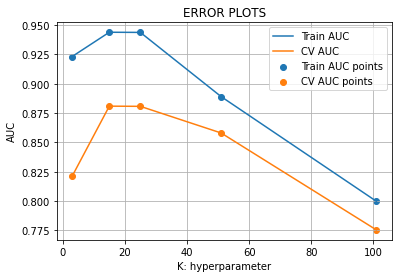

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)    
    y_cv_pred = batch_predict(neigh, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

The above graph shows that the best value of hyper parameter k should be between 15 - 25

### 3.1.2 Training the Model with best K value

In [183]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 17)
neigh.fit(X_tr, y_train)
from joblib import dump, load
dump(neigh, 'model.pkl') 


['model.pkl']

## 3.2 Prediction on test data

In [187]:
y_pred = neigh.predict_proba(X_te)[:,1]

In [184]:
y_pred1 = neigh.predict(X_te)

In [188]:
from sklearn.metrics import roc_auc_score,accuracy_score, confusion_matrix
print('roc_auc_score: ',roc_auc_score(y_test,y_pred))
print('Accuracy Score: ',accuracy_score(y_pred1,y_test))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred1))

roc_auc_score:  0.8899705449022041
Accuracy Score:  0.8658234126984127
Confusion Matrix: 
 [[15353  2327]
 [  378  2102]]


In [ ]:
# these feature engineering can improve our accuracy
#df["Prof_Freq"] = (df.groupby(["city","profession"])["profession"].transform("count")/ df.profession.count())
#df["current_job_freq"] = (df.groupby(["current_job_years","married"])["current_job_years"].transform("count")/ df.current_job_years.count())
# Best parameters
#['income','Prof_Freq','current_job_freq','married']

## 3.3 Preparing the prediction csv file  on test_data

In [ ]:
test_data['risk_flag'] = neigh.predict(test_data_process)

In [ ]:
submission = test_data[['id','risk_flag']]

In [ ]:
submission['risk_flag'].value_counts()

0    24674
1     3326
Name: risk_flag, dtype: int64

In [ ]:
submission['risk_flag'] = submission['risk_flag'].astype(int)

In [ ]:
submission.head()

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
filename = 'Prediction.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Prediction.csv
